# Week 5: Plotting with `matplotlib` & introduction to numerical integration

This week, we introduce the `matplotlib` library and its `pyplot` submodule to create line and scatter plots in Python. We also take the first steps towards numerical methods used to estimate definite integrals numerically.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$**.

In [1]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w05_solutions.md')

---
### 📚 Book sections

- **ASC**: sections **3.3**, 4.8.2, 6.1, 6.6
- **PCP**: sections 1.6.1, 6 (introduction), 6.1

🚩 Section **3.3** of **ASC** is highly recommended reading alongside the numerical integration section of this notebook.

---
## 1. Plotting with `matplotlib.pyplot`

### 1.1. A first plot

The `matplotlib` library and its `pyplot` interface contain a very large number of built-in functions for plotting data.

We import the plotting tools with

```python
import matplotlib.pyplot as plt
```

A basic line plot is generated using the `plt.plot()` function. For example, to plot $x \sin \left( x \right)$ for $x \in \left[ 0, 2 \pi \right]$:
* first, create a reasonably large number of values of $x$ at which to plot the function, for example using `np.linspace()` from the Numpy module;
* then, evaluate the function at these values;
* finally, **create** a line plot with `plt.plot()`, and **display it** with `plt.show()`.

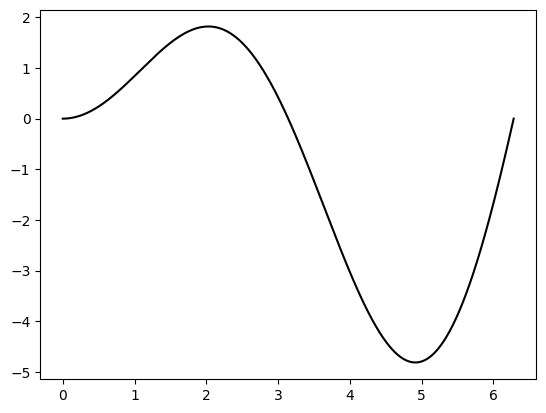

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create an x-axis with 1000 points
x = np.linspace(0., 2*np.pi, 1000)

# Evaluate the function at all these points
y = x * np.sin(x)

# Create the plot and display it
plt.plot(x, y, 'k-')
plt.show()

The final argument of `plt.plot()` defines the line colour and line type: here `'k'` indicates black, and `'-'` indicates a solid line.

The `plt.plot()` function can be used to generate scatter plots by replacing the character indicating the line style (for example `-` for a solid line) with a symbol to indicate a marker style. For example

```python
plt.plot(x, y, 'kx')
```

plots a scatter plot with black crosses. Here the `x` character in the final argument indicates the marker type.


---
**📚 Learn more:**

* [Matplotlib: Python plotting](https://matplotlib.org/contents.html) - Matplotlib documentation
* [Matplotlib gallery](https://matplotlib.org/gallery/index.html)
* [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) - Matplotlib documentation
* [Matplotlib line style reference](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)
* [Matplotlib: Specifying Colors](https://matplotlib.org/users/colors.html) - Matplotlib documentation
* [Matplotlib: markers](https://matplotlib.org/api/markers_api.html) - Matplotlib documentation
* [numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) - Numpy documentation
* [Chapter 4: Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/#4.-Visualization-with-Matplotlib) - J. VanderPlas, *The Python Data Science Handbook*

---

When plotting functions you should ensure that you evaluate the function at a sufficient number of points (typically at least $100$). `plt.plot(x, y)` draws one point per element in `x` and `y` (coordinates (`x[0], y[0]`), (`x[1], y[1]`), etc.), and joins these points with straight lines; a line plot therefore only looks smooth if the grid of points is dense enough. Try replacing `1000` with `10` in the code cell above to see this.

---
🚩 **Exercise 1**

Create a plot of the following functions on the interval $x \in \left[ -\pi, \pi \right]$. Try different line colours and types. Don't forget to `import matplotlib.pyplot as plt`, or to run the previous example cell to import it.
* a) $f_1(x) = \sin \left( x \right)$,  
* b) $f_2(x) = \tan \left( \frac{49}{100} x \right)$,  
* c) $f_3(x) = \sin \left( x \right) \cos \left( 2 x \right)$.

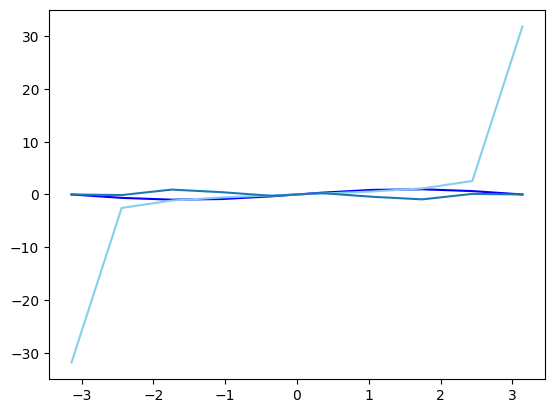

In [3]:
# Create x-vals using np.linspace (start, stop, # of values)
x = np.linspace(-np.pi, np.pi, 10)

f1 = np.sin(x)
f2 = np.tan((49/100) * x)
f3 = np.sin(x) * np.cos(2 * x)

plt.plot(x, f1, color = "blue")
plt.plot(x, f2, color = "skyblue")
plt.plot(x, f3)
plt.show()

In [4]:
show('Exercise 1')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 1.2. Figures and axes as objects

By default, if no plot exists, `plt.plot()` creates a *figure* window, and adds a set of *axes* to the figure. If a set of axes has already been created, when running `plt.plot()` a second time, the same axes are re-used, and the second plot is drawn over the first one. (This is true until you call `plt.show()`; further `plt.plot()` commands after a `plt.show()` will start another figure in your notebook.)

Like everything in Python, figures and axes are **objects**. The `plt.subplots()` function can used to create a new figure object, along with one or more set(s) of axes inside it. The statement

```python
fig, ax = plt.subplots(m, n)
```

creates a figure object, which we assign to the variable `fig`, and an **array** of axes, assigned to the variable `ax`, tiled in `m` rows and `n` columns.

Then, we can select individual axes in the array, and use `.plot()` as before (this time, as a **method** of the `Axes` object). Try it:

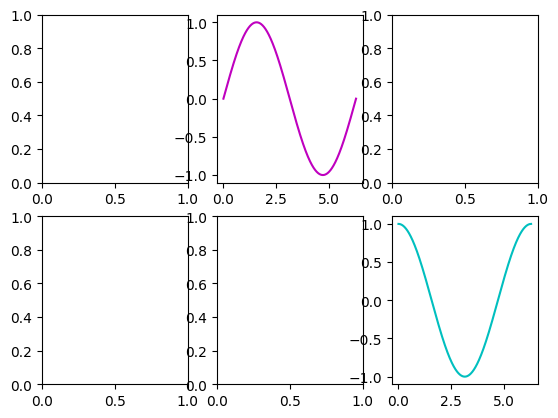

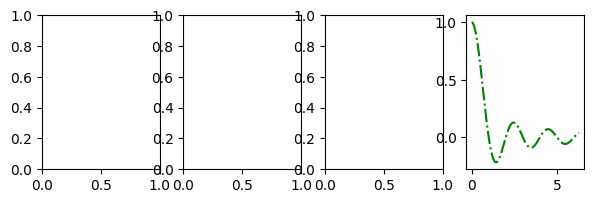

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define x
x = np.linspace(0, 2*np.pi, 1000)

# Create figure and axes
fig_1, ax_1 = plt.subplots(2, 3)

# We can also create a second figure, with the optional
# "figsize" argument of plt.subplots()
fig_2, ax_2 = plt.subplots(1, 4, figsize=(7, 2))

# Plot on 1st row, 2nd column of the first figure
ax_1[0, 1].plot(x, np.sin(x), 'm-')

# Plot on 2nd row, 3rd column
ax_1[1, 2].plot(x, np.cos(x), 'c-')

# Plot on 4th plot of the second figure
ax_2[3].plot(x, np.sinc(x), 'g-.')

# Show the result
plt.show()

Try changing the axes onto which these appear (for instance, try the second set of axes in the second figure).

Note that, when using `plt.subplots(m, n)` with `m` or `n` equal to `1` (that is, when creating a **single** row or column of plots), as is the case for `ax_2`, you only need **one index** to access a given subplot.

---
**📚 Learn more:**

* [Matplotlib Usage Guide: Parts of a figure](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure) -- **highly recommended read!**

---

🚩 **Exercise 2**

Use the `plt.subplots()` function to plot the three functions in the previous exercise in one figure, with a different subplot for each.

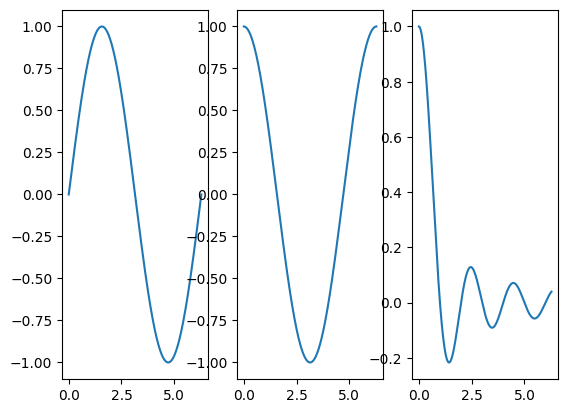

In [6]:
figure, axes = plt.subplots(1, 3)

axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
axes[2].plot(x, np.sinc(x))
plt.show()

In [7]:
show('Exercise 2')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## 2. Formatting plots

### 2.1. Setting plot axis properties

#### Axis limits

The axis range on your plots can be controlled using the `.set_xlim()` and `.set_ylim()` methods. For example, the following code plots the function $\sin \left( x \right)$ for $x \in \left[ 0, 2 \pi \right]$ on the `Axes` object assigned to the variable `my_ax`, and then specifies that the $x$-axis range should be from $0$ to $2 \pi$, and the $y$-axis range should be from $-1.1$ to $1.1$.

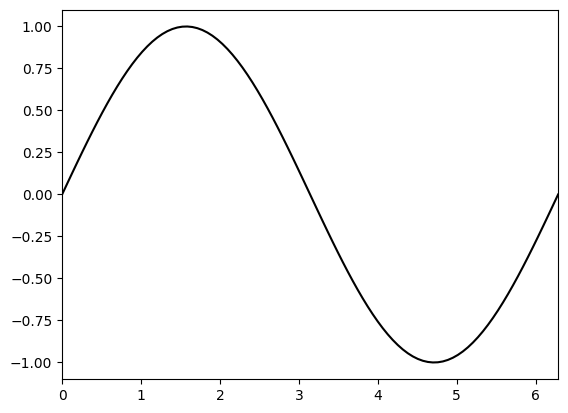

In [8]:
# Create 100 x-values from 0 to 2*pi
x = np.linspace(0, 2*np.pi, 100)

# Create the figure and axes
my_fig, my_ax = plt.subplots()

# Plot sin(x)
my_ax.plot(x, np.sin(x), 'k-')

# Adjust the x-axis and y-axis limits to tidy up the plot
my_ax.set_xlim([0, 2*np.pi])
my_ax.set_ylim([-1.1, 1.1])

# Show the figure
plt.show()

#### Axis labels

Axis labels can be added using the `.set_xlabel()` and `.set_ylabel()` methods, for example

```python
ax.set_xlabel('x', fontsize=12)
```

The label is the first argument, a string. The additional argument, `fontsize=12`, is used to control the font size of the axis label, here setting the font size to $12$pt.  If you wish you can use LaTeX in axis labels via

```python
ax.set_xlabel(r'$x$', fontsize=12)
```

where the `r` before the label means "raw string"; this allows backslashes in e.g. LaTeX math symbols to be interpreted correctly.

> Plots should **always** include appropriate labelling!

---
🚩 **Exercise 3**

Start by running your code for Exercise 2, to create the 3 plots again. Use `set_xlim()` to control the $x$-axis range for each of the 3 plots, plotting values of $x \in \left[-\pi, \pi \right]$.

Use `set_xlabel()` and `set_ylabel()` to add axis labels to the plots, with a font size of $14$pt.

*Hints:*
* If the plot becomes a little squeezed, you can adjust the *spacing* between the subplots in a figure after you have created them (but before `plt.show()`), using the function `plt.subplots_adjust()`, for example
```python
plt.subplots_adjust(hspace=0.5, wspace=0.5)
```
where `hspace` (height spacing) and `wspace` (width spacing) should take values between 0 and 1. (See [Matplotlib: subplots_adjust](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html))
* Since the axes are indexed by number, you can use a `for` loop to set properties common to all axes.

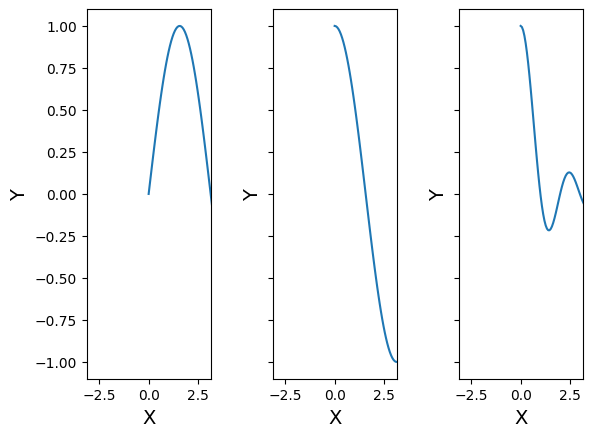

In [9]:
# Creates np.figure and axes which is np.array of subplots
figure, axes = plt.subplots(1, 3, sharey = True)

# Plot on each respective function
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
axes[2].plot(x, np.sinc(x))

# Set labels, x limits
for idx in range(0,3):
    axes[idx].set_xlim([-np.pi, np.pi])
    axes[idx].set_xlabel("X", fontsize = 14)
    axes[idx].set_ylabel("Y", fontsize = 14)

# Adjust space btwn (ws) and space above(hs)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

# Show the plot. This helps when you want to plot a new plot following.
plt.show()

In [10]:
show('Exercise 3')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 2.2. Adding a legend

Earlier, we have seen how to display multiple lines on the same set of axes. When doing so, it is essential to add a legend to the plot, using **`ax.legend()`**, which labels all curves of the plot in `ax`. The label text should be set **when plotting the curve**, using the `label=` keyword argument of `.plot()`, and can contain LaTeX code.

For example, the following code displays a legend on `ax` with the green curve labelled $y_1$ and the yellow curve labelled $y_2$.

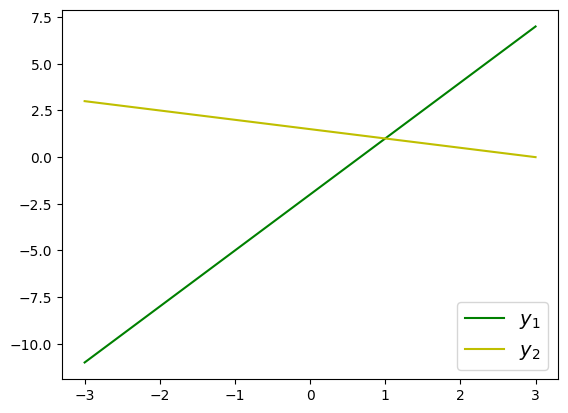

In [11]:
# Create an x-axis, and make 2 linear functions of x
x = np.linspace(-3, 3, 100)
y1 = 3*x - 2
y2 = -0.5*x + 1.5

# Plot both curves on the same axes
fig, ax = plt.subplots()
ax.plot(x, y1, 'g-', label=r'$y_1$')
ax.plot(x, y2, 'y-', label=r'$y_2$')

# .legend() will use the "label" arguments for each curve
ax.legend(loc='lower right', fontsize=14)

plt.show()

Note that the **location** can be controlled via an additional keyword argument `loc`, followed by a string indicating the location. Other locations can be chosen, for example you can try changing `'lower right'` to `'upper left'`.

The legend font size is also controlled the same way as for axis labels, e.g. here the font size is set to $14$.

---
**📚 Learn more:**

* [Matplotlib: legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) - Documentation
* [Customizing Plot Legends](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html) - The Python Data Science Handbook

---
🚩 **Exercise 4**

The Maclaurin series for $\cos(x)$ is given by

$$
\cos(x) = \sum_{k=0}^{\infty} (-1)^k \frac{x^{2k}}{(2k)!}.
$$

Create a new figure with a single set of axes. Plot $\cos(x)$ over the interval $[-\pi, \pi]$. On the same axes, plot the Maclaurin series truncated to the second, fourth, and sixth order terms, evaluated over the same interval. Set the axis ranges and labels, and add a legend to the plot.

*Hint:* you may wish to use the function [`math.factorial()` included with the `math` module](https://docs.python.org/3/library/math.html).

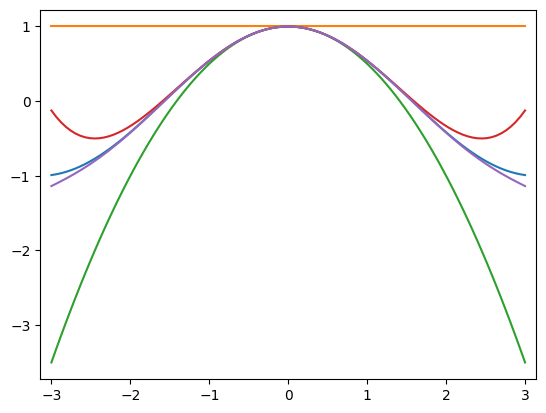

In [12]:
from math import factorial
figure, axes = plt.subplots()

axes.plot(x, np.cos(x))
axes.set_xlim([-np.pi, np.pi])

mcl_series: list[float] = []
for idx in range(4):
    term = ((-1) ** idx) * (x ** (2 * idx)) / factorial(2 * idx)
    if idx == 0:
        mcl_series.append(term)
    else:
        mcl_series.append(mcl_series[idx-1] + term)
    axes.plot(x, mcl_series[idx])

In [13]:
show('Exercise 4')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 5**

Reproduce the following figure, as closely as possible. (Note: the triangles are called "markers" -- you can search for that in the documentation.)

![The figure to reproduce.](graphics/fig.png)

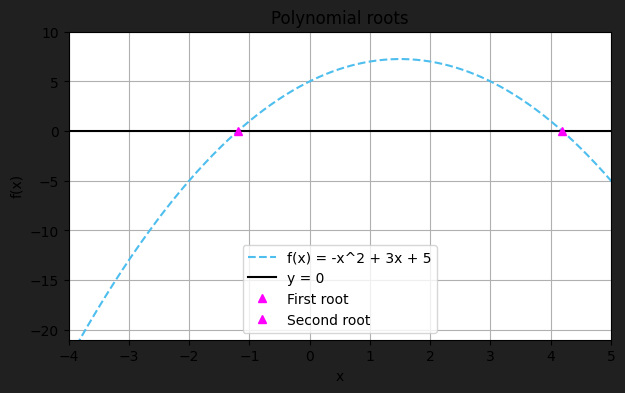

In [14]:
figure, axes = plt.subplots(figsize = (7, 4))
x = np.linspace(-6, 6, 1000)
y = np.linspace(0, 0, 1000)
root1, root2 = np.roots([-1, 3, 5])
axes.plot(x, (-(x ** 2)) + (3 * x) + 5, "--", color = "#4DBEEE", label = "f(x) = -x^2 + 3x + 5")
axes.plot(x, y, color = "black", label = "y = 0")
axes.plot(root2,(-(root2 ** 2)) + (3 * root2) + 5, "^", color = "fuchsia", label = "First root")
axes.plot(root1,(-(root1 ** 2)) + (3 * root1) + 5, "^", color = "fuchsia", label = "Second root")


axes.grid(True)
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.legend(loc = "lower center")
axes.set_xlim([-4, 5])
axes.set_ylim([-21, 10])
axes.set_title('Polynomial roots')
figure.patch.set_facecolor('#202020')  # Light gray color; adjust the color code as needed


plt.show()

In [15]:
show('Exercise 5')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

## 3. Numerical integration

🚩 *Recommended reading:* Section 3.3 in **ASC**

Numerical integration is the process of computing an approximation of a definite integral, using a particular *scheme*. There are many different ways we could go about this, but in general, we want to approximate an integral using a **weighted sum** which is easy to compute:

$$
\int_a^b f(x) \ dx \approx \sum_{k=0}^{N-1} w_k f(x_k),
$$

where
- $x_k \in [a, b]$ are **nodes**, i.e. a finite number of points chosen in the integration interval,
- $w_k \in \mathbb{R}$ are **weights** (coefficients) chosen appropriately.

The choice of nodes and weights differentiates one numerical integration method from another, and different choices lead to different *degrees of precision*. We can also build *composite rules* by sub-dividing the interval $[a, b]$ into smaller intervals, and approximating the integral on each sub-interval, and summing the results. We will see more about all of this next week.

### 3.0. Preface: Modules

To avoid cluttering our notebook, the bulk of the code for the rest of this notebook is provided as functions, in the **module** `integration.py`.

A **module** is simply a `.py` file which contains Python definitions. You have already used plenty of them -- for example, `show_solutions.py`, or really anything you have `import`ed before.

Take a look inside `integration.py`. It contains some functions we will use later. For now, look at `test_after_import()`. To use the functions inside the module here in your notebook, we just need to import it, using the file name (without the `.py`), and then **prefix** function calls with its name (exactly like we've been doing for e.g. NumPy functions):

In [16]:
import integration as intg

intg.test_after_import(3)

Import successful! x is 3.
Hey girl!


Now, **edit `integration.py`** to add a second `print()` command of your choice inside the `test_after_import()` function. Run the code below to check if your changes have taken effect:

In [17]:
intg.test_after_import(4)

Import successful! x is 4.
Hey girl!


This doesn't work! The notebook is still using the old version of the module, before your new changes. Even if we re-import the module again, this still won't work:

In [18]:
import integration as intg
intg.test_after_import(4)

Import successful! x is 4.
Hey girl!


After `import`ing a module, re-running the same `import` command in a notebook at a later point will **not** actually re-import your module, even if you've made changes to it. This is a default Python behaviour: it will only import a module once per interactive session (i.e. until you restart the kernel).

The solution is to "force" the notebook to re-import the module, every time you make changes to it. We can do this using the `reload()` function provided by the `importlib` built-in module (the `;` is just to remove the ugly output):

In [19]:
import importlib
importlib.reload(intg);

# Try again...
intg.test_after_import(4)

Import successful! x is 4.
Hey girl!


Keep this in mind when you are prototyping your own modules.

---

#### Running a module as a Python script

Scroll down to the bottom of `integration.py`. You will see something a little strange:

```python
if __name__ == '__main__':
    test_after_import(np.pi)
```

If you try to **run** `integration.py` as a regular standalone Python script, you should see that the command in the `if` statement is executed as normal.

Now, comment out the line with the `if` statement, un-indent the function call below it, and run `integration.py` as a script again. The command should still be executed as normal -- so far, so good.

However, let's re-import the module in our notebook (remember, we have to reload it):

In [20]:
importlib.reload(intg);

Now, because we got rid of `if __name__ == '__main__':`, we have a stray Python command at the end of our module, which will be executed _every time_ we import the module.

This is clearly not what we want -- usually we want to `import` things silently. In a module, you should typically only have `import` statements at the top, and function **definitions**. However, sometimes it's useful to be able to **test** the functions in a module, for example, without having to import it into a notebook. In that case, all the code used for testing should go under `if __name__ == '__main__':`.

---
**📚 Learn more:**

- [Modules](https://docs.python.org/3/tutorial/modules.html) - Python documentation
- [Executing modules as scripts](https://docs.python.org/3/tutorial/modules.html#executing-modules-as-scripts)

---

*Optional if you're curious: [`__main__` is the name of the environment where top-level code is run](https://docs.python.org/3/library/__main__.html#what-is-the-top-level-code-environment). Take a look at `my_module.py`, and the output of this cell (it's force-reloaded every time in case you want to change it and see what happens):*

In [21]:
import my_module
importlib.reload(my_module);

print(f'From the notebook: __name__ is {__name__}')

From inside the module: __name__ is my_module
From inside the module: __name__ is my_module
From the notebook: __name__ is __main__


---

### 3.1. Riemann sums

You probably already know a numerical integration method -- the Riemann sum. Run the code cell below to display a figure (it uses [`matplotlib.patches.Polygon()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html) -- take a look inside `integration.py`):

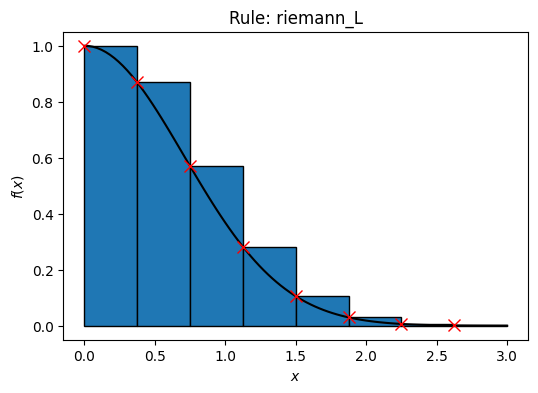

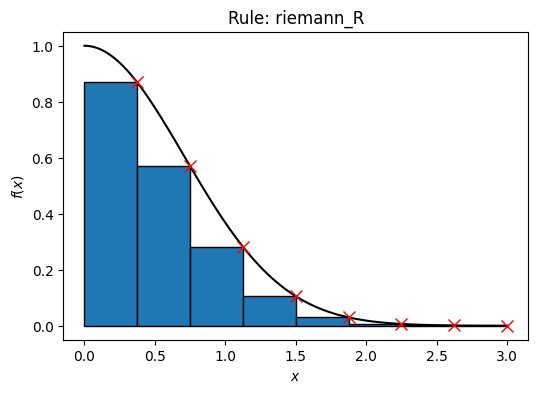

In [22]:
# Import our custom 'integration.py' module
import integration as intg
import importlib
importlib.reload(intg);
import numpy as np

# Create some test function
def f(x):
    return np.exp(-x**2)

# We want to integrate f over an interval [a, b], sub-divided into N segments
a, b = 0, 3
M = 8

# Display an illustration of the left and right Riemann sum methods
intg.display_diagram('riemann_L', f, a, b, M)
intg.display_diagram('riemann_R', f, a, b, M)

We can estimate the integral of $f(x)$ by calculating the total area shaded in blue.

This is an example of a **composite rule**. Let's break it down: we first subdivide the interval $[a, b]$ into $M$ sub-intervals of equal width $h$, with

$$
h = \frac{b-a}{M}.
$$

We now have the $N$ sub-intervals $[a + ih, a + (i+1)h]$, where $i = 0, 1, \dots, M-1$. Then, on **each** sub-interval, this method approximates the value of the function at **one point** (one **node**):

- the *left* Riemann sum uses the *left* boundary of each sub-interval, $a + ih$;
- the *right* Riemann sum uses the *right* boundary of each sub-interval, $a + (i+1)h$.

The integral of $f(x)$ over each sub-interval $a + ih$ is approximated by the area of one rectangle, with width $h$, and height $f(a+ih)$ (left) or $f(a+(i+1)h)$ (right). To obtain the total integral of $f(x)$ over $[a, b]$, we can sum the approximated integrals over each sub-interval:

$$
\int_a^b f(x) \ dx \approx
\begin{cases}
\sum_{i=0}^{M-1} h \ f(a + ih) & \qquad \text{left Riemann sum}, \\
\sum_{i=0}^{M-1} h \ f(a + (i+1)h) & \qquad \text{right Riemann sum}.
\end{cases}
$$

---

Let's estimate the integral of $f(x)$ using the left and right Riemann sums, and compare the results to the exact integral. Take a look at the `estimate_integral()` function in `integration.py`, make sure you understand how it works, and run the code below:

In [23]:
from math import erf

# Estimate the integral using the left and right Riemann sums
I_approx_left = intg.estimate_integral('riemann_L', f, a, b, M)
I_approx_right = intg.estimate_integral('riemann_R', f, a, b, M)

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

print(f'The exact integral is {I_exact:.3f}.\n')
print(f'The left Riemann sum is {I_approx_left:.3f}.\n')
print(f'The right Riemann sum is {I_approx_right:.3f}.\n')

The exact integral is 0.886.

The left Riemann sum is 1.074.

The right Riemann sum is 0.699.



---
🚩 **Exercise 6**

Using the Riemann sum methods above, estimate the value of the integral using different values of $M$. How does the error change with $M$?

*Hint:* try values of M which are powers of 2, and plot $\log(M)$ vs. $\log(\text{error})$. How does the error change when $M$ doubles? You may wish to use e.g. [`np.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) or [`scipy.stats.linregress()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

The exact integral is 0.886.

The left Riemann sum is 1.074.

The right Riemann sum is 0.699.



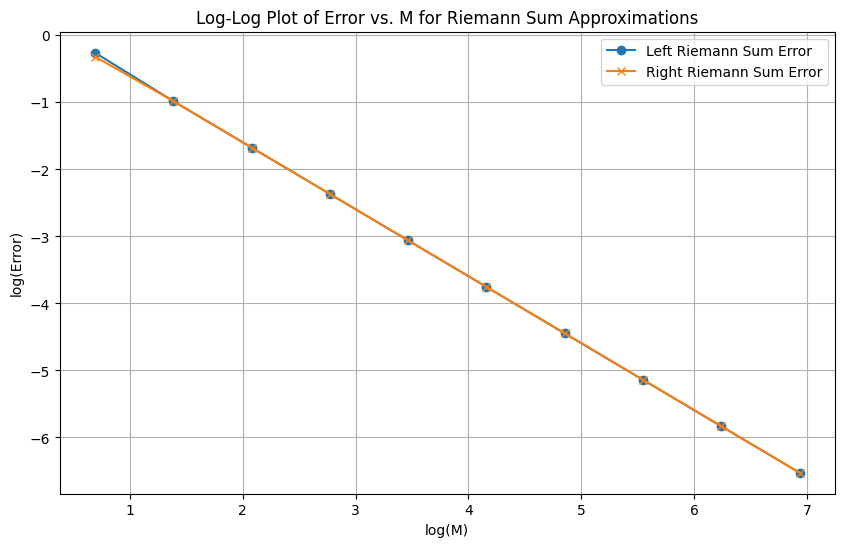

In [37]:
# Estimate the integral using the left and right Riemann sums
I_approx_left = intg.estimate_integral('riemann_L', f, a, b, M)
I_approx_right = intg.estimate_integral('riemann_R', f, a, b, M)

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

print(f'The exact integral is {I_exact:.3f}.\n')
print(f'The left Riemann sum is {I_approx_left:.3f}.\n')
print(f'The right Riemann sum is {I_approx_right:.3f}.\n')


M_values = 2**np.arange(1, 11)  # 2, 4, 8, ..., 1024

# Arrays to store errors
errors_left = []
errors_right = []

# Exact value of the integral
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

# Estimate the integral and calculate errors for each M
for M in M_values:
    I_approx_left = intg.estimate_integral('riemann_L', f, a, b, M)
    I_approx_right = intg.estimate_integral('riemann_R', f, a, b, M)
    
    error_left = np.abs(I_approx_left - I_exact)
    error_right = np.abs(I_approx_right - I_exact)
    
    errors_left.append(error_left)
    errors_right.append(error_right)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.log(M_values), np.log(errors_left), label='Left Riemann Sum Error', marker='o')
plt.plot(np.log(M_values), np.log(errors_right), label='Right Riemann Sum Error', marker='x')
plt.xlabel('log(M)')
plt.ylabel('log(Error)')
plt.title('Log-Log Plot of Error vs. M for Riemann Sum Approximations')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
show('Exercise 6')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 3.2. The midpoint rule

The midpoint rule is similar to the Riemann sums (it also uses only one node), but the node in each partition is taken as the **midpoint** of the partition, instead of one of the extremities:

$$
\int_a^b f(x) \ dx \approx \sum_{i=0}^{M-1} h \ f\left(a + \left(i + \frac{1}{2}\right)h\right).
$$

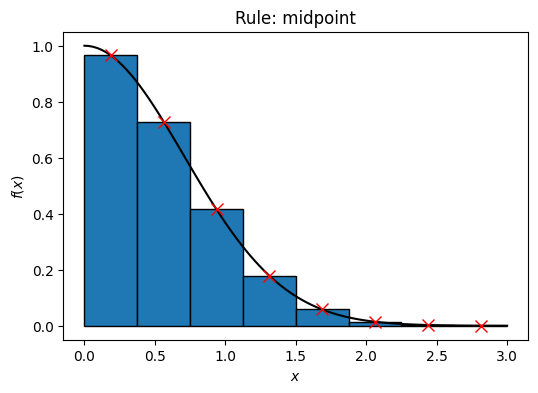

The exact integral is 0.886207.

The estimated integral using the midpoint rule is 0.886211.



In [ ]:
# Display an illustration of the midpoint rule
intg.display_diagram('midpoint', f, a, b, M)

# Estimate the integral
I_approx_midpoint = intg.estimate_integral('midpoint', f, a, b, M)

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

print(f'The exact integral is {I_exact:.6f}.\n')
print(f'The estimated integral using the midpoint rule is {I_approx_midpoint:.6f}.\n')

---
🚩 **Exercise 7**

Using the midpoint rule method above, estimate the value of the integral using different values of $M$. How does the error change with $M$?

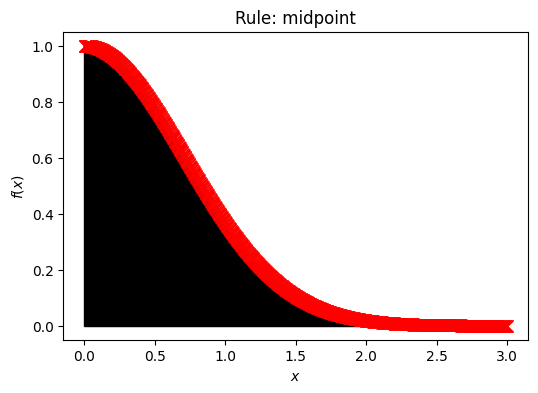

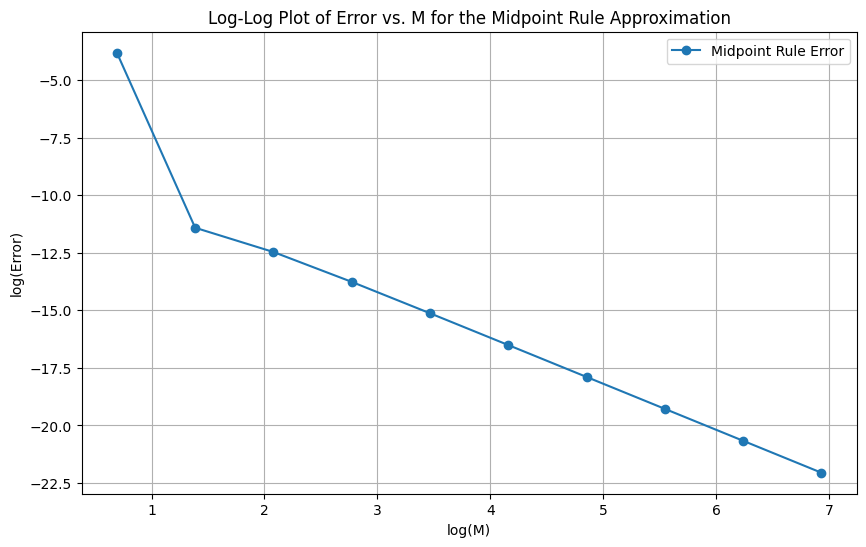

In [47]:
# Display an illustration of the midpoint rule
intg.display_diagram('midpoint', f, a, b, M)

# Estimate the integral
I_approx_midpoint = intg.estimate_integral('midpoint', f, a, b, M)

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

m_values = 2 ** np.arange(1, 11)

error_midpoint = []
for m in m_values:
    error_midpoint.append(np.abs(I_exact - (intg.estimate_integral('midpoint', f, a, b, m))))

plt.figure(figsize=(10, 6))
plt.plot(np.log(m_values), np.log(error_midpoint), label='Midpoint Rule Error', marker='o')
plt.xlabel('log(M)')
plt.ylabel('log(Error)')
plt.title('Log-Log Plot of Error vs. M for the Midpoint Rule Approximation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
show('Exercise 7')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 3.3. The trapezoid rule

The trapezoid rule also uses partitions of equal width, but instead of approximating the integral as the area of rectangles, it uses trapezoids. In other words, the function is interpolated linearly between **two nodes**, one at each boundary of the sub-interval.

$$
\int_a^b f(x) \ dx \approx \sum_{i=0}^{M-1} \frac{h}{2}\left(f(x_i) + f(x_{i+1})\right) ,
$$

where the node $x_i$ is given by $x_i = a + ih$, with $i = 0, 1, \dots, N$.

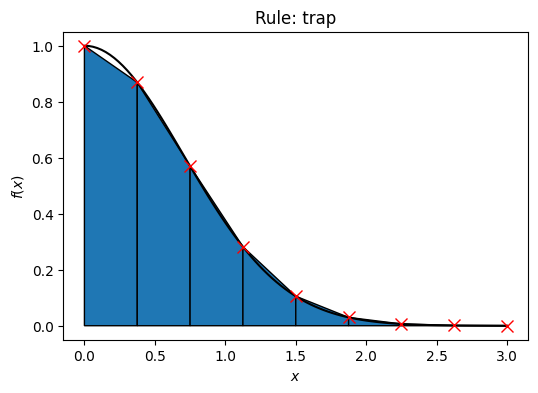

The exact integral is 0.886207.

The estimated integral using the trapezoid rule is 0.886199.



In [ ]:
# Show an illustration of the trapezoid rule
intg.display_diagram('trap', f, a, b, M)

# Estimate the integral
I_approx_trap = intg.estimate_integral('trap', f, a, b, M)

# Exact value
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

print(f'The exact integral is {I_exact:.6f}.\n')
print(f'The estimated integral using the trapezoid rule is {I_approx_trap:.6f}.\n')

---
🚩 **Exercise 8**

Using the trapezoid rule method above, estimate the value of the integral using different values of $M$. How does the error change with $M$?

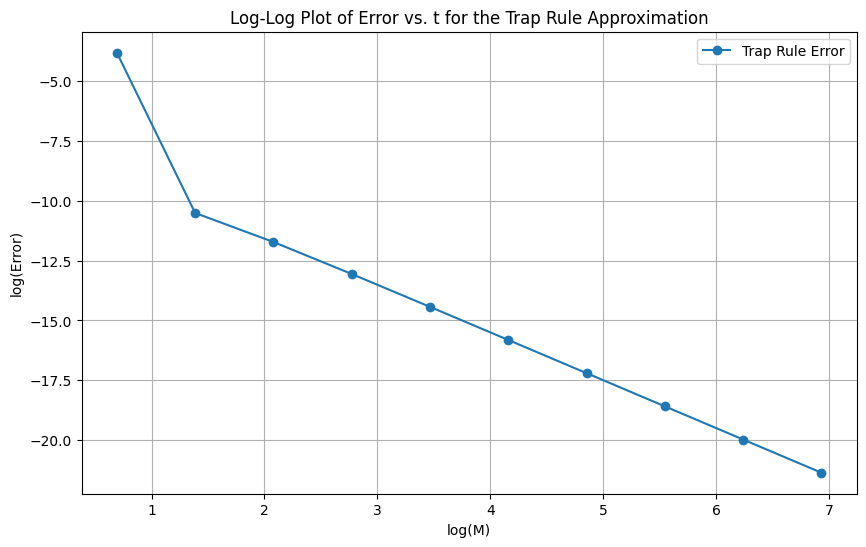

In [50]:
I_exact = np.sqrt(np.pi) / 2 * (erf(b) - erf(a))

t_values = 2 ** np.arange(1, 11)

error_trap = []
for t in t_values:
    error_trap.append(np.abs(I_exact - (intg.estimate_integral('trap', f, a, b, t))))

plt.figure(figsize=(10, 6))
plt.plot(np.log(t_values), np.log(error_trap), label='Trap Rule Error', marker='o')
plt.xlabel('log(M)')
plt.ylabel('log(Error)')
plt.title('Log-Log Plot of Error vs. t for the Trap Rule Approximation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
show('Exercise 8')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…